In [ ]:
pip install plotly

In [1]:
import pandas as pd
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [4]:
df = pd.read_csv('/content/dataset.csv')

In [12]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,1.0,475635324.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,38.0,253546023.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10


In [6]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  4
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      1
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 119
DOL Vehicle ID                                         1
Vehicle Location                                       6
Electric Utility                                     199
2020 Census Tract                                      1
dtype: int64


In [7]:
df.dropna(inplace=True)

In [9]:
print(df.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                       float64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [10]:
print(df.describe())

        Postal Code    Model Year  Electric Range      Base MSRP  \
count  43990.000000  43990.000000    43990.000000   43990.000000   
mean   98260.201819   2018.998886       88.704069    1743.703001   
std      304.042941      2.879150      102.634324   10497.454913   
min    98001.000000   1997.000000        0.000000       0.000000   
25%    98052.000000   2017.000000        0.000000       0.000000   
50%    98121.000000   2020.000000       33.000000       0.000000   
75%    98370.000000   2022.000000      208.000000       0.000000   
max    99403.000000   2023.000000      337.000000  184400.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count          43990.000000    4.399000e+04       4.399000e+04  
mean              29.916345    1.989909e+08       5.303959e+10  
std               14.613976    9.418651e+07       1.623303e+07  
min                1.000000    1.028600e+04       5.300195e+10  
25%               19.000000    1.482043e+08       5.303301e+10

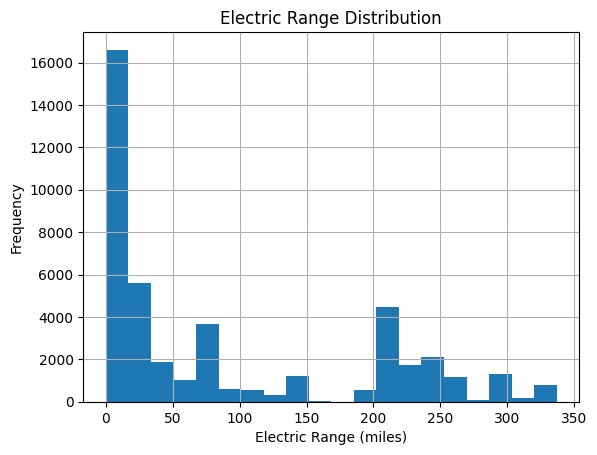

In [13]:
import matplotlib.pyplot as plt

df['Electric Range'].hist(bins=20)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

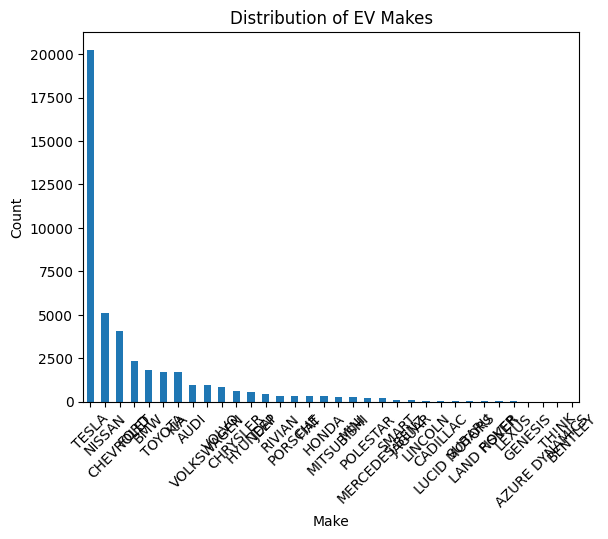

In [14]:
df['Make'].value_counts().plot(kind='bar')
plt.title('Distribution of EV Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

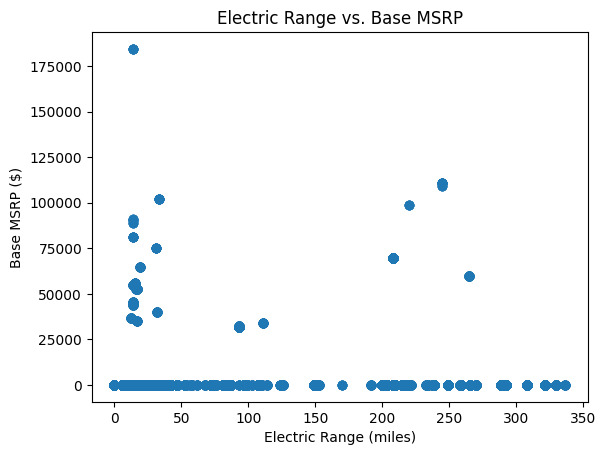

In [16]:
plt.scatter(df['Electric Range'], df['Base MSRP'])
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


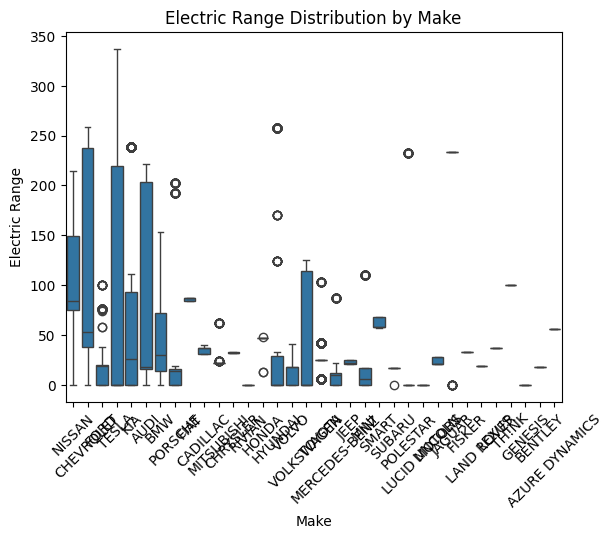

In [17]:
import seaborn as sns

sns.boxplot(x='Make', y='Electric Range', data=df)
plt.title('Electric Range Distribution by Make')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Group by County or State and count the number of EVs
location_counts = df.groupby('County').size().reset_index(name='Count')

In [19]:
print(location_counts.head())

    County  Count
0    Adams     16
1   Asotin     20
2   Benton    574
3   Chelan    256
4  Clallam    266


In [22]:
pip install plotly


In [23]:
import plotly.express as px
fig = px.choropleth(location_counts,
                     locations='County',
                     locationmode='USA-states',
                     color='Count',
                     title='Number of Electric Vehicles by County',
                     color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [25]:
fig.update_layout(title_text='Number of Electric Vehicles by County',
                  geo=dict(scope='asia'))

In [26]:
make_counts = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [27]:
print(make_counts.head())

   Model Year       Make  Count
0        1997  CHEVROLET      1
1        1999       FORD      1
2        2000       FORD      2
3        2008      TESLA      5
4        2010      TESLA     14


In [28]:
fig = px.bar(make_counts,
             x='Count',
             y='Make',
             animation_frame='Model Year',
             range_x=[0, make_counts['Count'].max()],
             title='Racing Bar Plot of EV Makes by Year',
             labels={'Make': 'EV Make', 'Count': 'Number of Vehicles'})
fig.show()